In [1]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
    th{
        background-color:blueviolet !important;
        text-align:center;
        color:white;
    }
    th,td{
        border:0.1px solid black !important;
        transition:0.2s all liner;
        
    }
    td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
    .atcenter{
        text-align:center !important;
    }
    .imp{
        color:red;
        font-weight:bolder;
    }
</style>

## 4.12 自定义坐标轴刻度

虽然 Matplotlib 默认的坐标轴定位器（locator）与格式生成器
（formatter）可以满足大部分需求，但是并非对每一幅图都合适。本节
将通过一些示例演示如何将坐标轴刻度调整为你需要的位置与格式。
在介绍示例之前，我们最好先对 Matplotlib 图形的对象层级有更深入的
理解。Matplotlib 的目标是用 Python 对象表现任意图形元素。例如，想
想前面介绍的 figure 对象，它其实就是一个盛放图形元素的包围盒
（bounding box）。可以将每个 Matplotlib 对象都看成是子对象（subobject）的容器，例如每个 figure 都会包含一个或多个 axes 对象，每
个 axes 对象又会包含其他表示图形内容的对象。
坐标轴刻度线也不例外。每个 axes 都有 xaxis 和 yaxis 属性，每个属
性同样包含构成坐标轴的线条、刻度和标签的全部属性。

### 4.12.1 主要刻度与次要刻度

每一个坐标轴都有主要刻度线与次要刻度线。顾名思义，主要刻度往往
更大或更显著，而次要刻度往往更小。虽然一般情况下 Matplotlib 不会
使用次要刻度，但是你会在对数图中看到它们（如图 4-73 所示）：

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.axes?

Signature: plt.axes(arg: 'None | tuple[float, float, float, float]' = None, **kwargs) -> 'matplotlib.axes.Axes'
Docstring:
Add an Axes to the current figure and make it the current Axes.

Call signatures::

    plt.axes()
    plt.axes(rect, projection=None, polar=False, **kwargs)
    plt.axes(ax)

Parameters
----------
arg : None or 4-tuple
    The exact behavior of this function depends on the type:

    - *None*: A new full window Axes is added using
      ``subplot(**kwargs)``.
    - 4-tuple of floats *rect* = ``(left, bottom, width, height)``.
      A new Axes is added with dimensions *rect* in normalized
      (0, 1) units using `~.Figure.add_axes` on the current figure.

projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
    The projection type of the `~.axes.Axes`. *str* is the name of
    a custom projection, see `~matplotlib.projections`. The default
    None results in a 'rectilinear' projection.

polar : bool, default: Fals

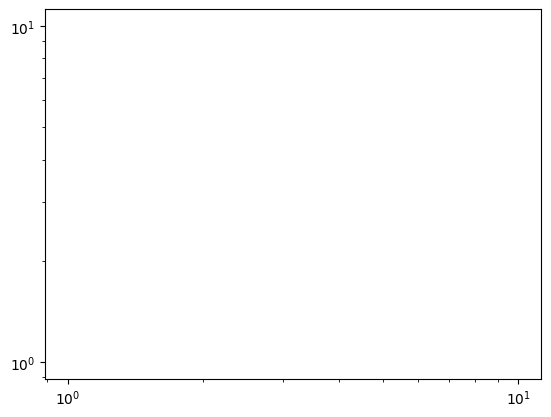

In [5]:
ax = plt.axes(xscale='log',yscale='log')

<p class='atcenter'>图 4-73：对数刻度与标签</p>

我们发现每个主要刻度都显示为一个较大的刻度线和标签，而次要刻度
都显示为一个较小的刻度线，且不显示标签。  
可以通过设置每个坐标轴的 formatter 与 locator 对象，自定义这些
刻度属性（包括刻度线的位置和标签）。来检查一下图形 x 轴的属性：


In [6]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_major_locator())

In [7]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())


我们会发现，主要刻度标签和次要刻度标签的位置都是通过一个
LogLocator 对象（在对数图中可以看到）设置的。然而，次要刻度有
一个 NullFormatter 对象处理标签，这样标签就不会在图上显示了。  
下面来演示一些示例，看看不同图形的定位器与格式生成器是如何设置
的。

### 4.12.2 隐藏刻度与标签

In [8]:
#407